<a href="https://colab.research.google.com/github/RaniaBZ/Multi-model-RAG/blob/main/multimodal_rag2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install open-clip-torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.3 MB/s eta 0:00:00


In [2]:
pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.6 MB/s eta 0:00:00


In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
!pip install python-dotenv

In [5]:
from matplotlib import pyplot as plt
import os
from PIL import Image
import warnings
from dotenv import load_dotenv

In [6]:
load_dotenv()

False

In [7]:
# Suppress all warnings
warnings.filterwarnings("ignore")
from datasets import load_dataset

In [8]:
ds = load_dataset("huggan/flowers-102-categories")

dataset_infos.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/347M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8189 [00:00<?, ? examples/s]

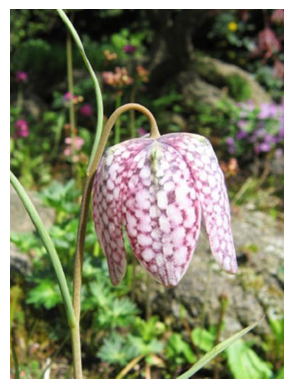

In [9]:
#get an image from the dataset
flower = ds["train"][78]["image"]

plt.imshow(flower)
plt.axis("off")
plt.show()

In [10]:
def show_image_from_uri(uri):
    # Open the image using PIL
    img = Image.open(uri)

    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [11]:
dataset_folder = "./dataset/flowers-102-categories"
os.makedirs(dataset_folder, exist_ok=True)

In [12]:
# Function to save images
def save_images(dataset, dataset_folder, num_images=500):
    for i in range(num_images):
        print(f"Saving image {i+1} of {num_images}")
        # Get the image data
        image = dataset["train"][i]["image"]

        # Save the image
        image.save(os.path.join(dataset_folder, f"flower_{i+1}.png"))

    print(f"Saved the first 500 images to {dataset_folder}")

In [13]:
# save_images(ds, dataset_folder, num_images=500)

Saving image 1 of 500
Saving image 2 of 500
Saving image 3 of 500
Saving image 4 of 500
Saving image 5 of 500
Saving image 6 of 500
Saving image 7 of 500
Saving image 8 of 500
Saving image 9 of 500
Saving image 10 of 500
Saving image 11 of 500
Saving image 12 of 500
Saving image 13 of 500
Saving image 14 of 500
Saving image 15 of 500
Saving image 16 of 500
Saving image 17 of 500
Saving image 18 of 500
Saving image 19 of 500
Saving image 20 of 500
Saving image 21 of 500
Saving image 22 of 500
Saving image 23 of 500
Saving image 24 of 500
Saving image 25 of 500
Saving image 26 of 500
Saving image 27 of 500
Saving image 28 of 500
Saving image 29 of 500
Saving image 30 of 500
Saving image 31 of 500
Saving image 32 of 500
Saving image 33 of 500
Saving image 34 of 500
Saving image 35 of 500
Saving image 36 of 500
Saving image 37 of 500
Saving image 38 of 500
Saving image 39 of 500
Saving image 40 of 500
Saving image 41 of 500
Saving image 42 of 500
Saving image 43 of 500
Saving image 44 of 5

In [14]:
# == Setup the chromaDB ==
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader

In [15]:
# create a chromadb object
chroma_client = chromadb.PersistentClient(path="./data/flower.db")

In [16]:
# instantiate image loader
image_loader = ImageLoader()

In [17]:
# instantiate multimodal embedding function
embedding_function = OpenCLIPEmbeddingFunction()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [18]:
# create the collection, - vector database
flower_collection = chroma_client.get_or_create_collection(
    "flowers_collection",
    embedding_function=embedding_function,
    data_loader=image_loader,
)

In [19]:
ids = []
uris = []

In [20]:
### Iterate over each file in the dataset folder
for i, filename in enumerate(sorted(os.listdir(dataset_folder))):
    if filename.endswith(".png"):
        file_path = os.path.join(dataset_folder, filename)

        # Append id and uri to respective lists
        ids.append(str(i))
        uris.append(file_path)

In [21]:
# Assuming multimodal_db is already defined and available
flower_collection.add(ids=ids, uris=uris)

print("Images added to the database.")

print(flower_collection.count())

Images added to the database.
500


In [22]:
# === Functions for Querying the VectorDB ===
def query_db(query, results=5):
    print(f"Querying the database for: {query}")
    results = flower_collection.query(
        query_texts=[query], n_results=results, include=["uris", "distances"]
    )
    return results

In [23]:
def print_results(results):
    for idx, uri in enumerate(results["uris"][0]):
        print(f"ID: {results['ids'][0][idx]}")
        print(f"Distance: {results['distances'][0][idx]}")
        print(f"Path: {uri}")
        # Display the image using matplotlib
        show_image_from_uri(uri)
        print("\n")

Querying the database for: purple petals
ID: 15
Distance: 1.4138412475585938
Path: ./dataset/flowers-102-categories/flower_112.png


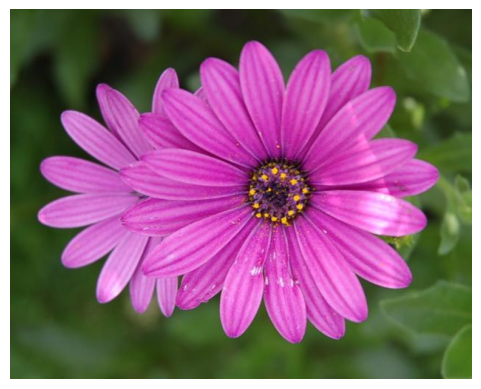



ID: 345
Distance: 1.414852499961853
Path: ./dataset/flowers-102-categories/flower_41.png


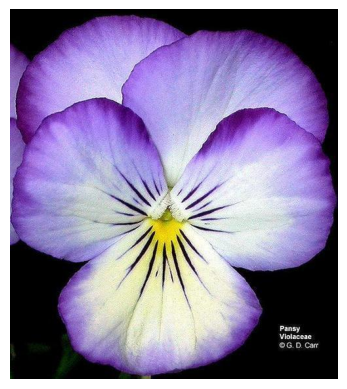



ID: 424
Distance: 1.4168593883514404
Path: ./dataset/flowers-102-categories/flower_481.png


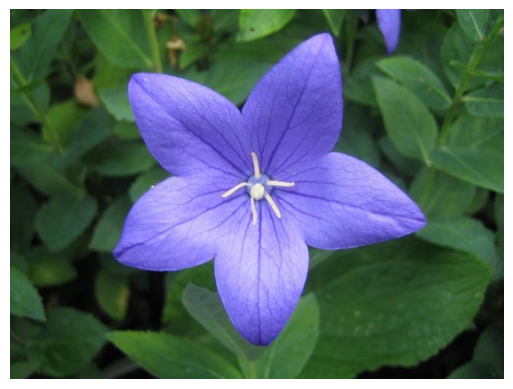



ID: 448
Distance: 1.4239698648452759
Path: ./dataset/flowers-102-categories/flower_52.png


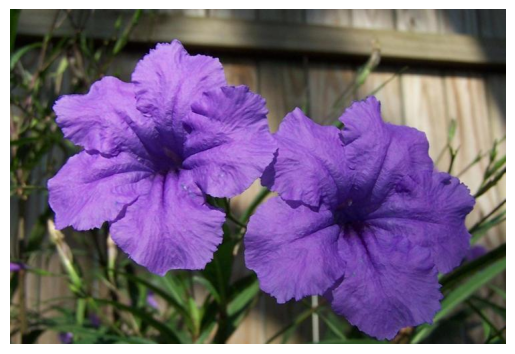



ID: 225
Distance: 1.426279902458191
Path: ./dataset/flowers-102-categories/flower_301.png


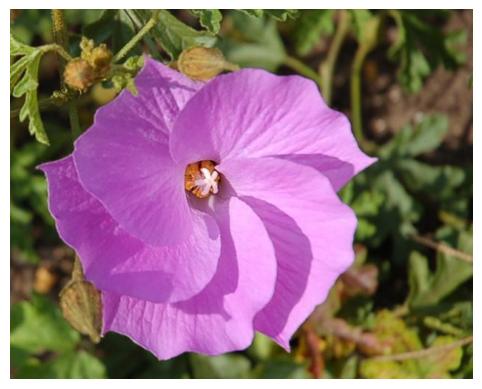

In [24]:
query = "purple petals"
results = query_db(query)
print_results(results)

In [25]:
pip install langchain-community langchain-core langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchai

In [29]:
from transformers import pipeline
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
import base64


In [41]:
vision_model = pipeline('text-generation', model="gpt2")

Device set to use cpu


In [42]:
# Instantiate the output parser
parser = StrOutputParser()

In [43]:
# Define the prompt template
image_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a talented florist and you have been asked to create a bouquet of flowers for a special event. Answer the user's question using the given image context with direct references to parts of the images provided."
            " Maintain a more conversational tone, don't make too many lists. Use markdown formatting for highlights, emphasis, and structure.",
        ),
        (
            "user",
            [
                {
                    "type": "text",
                    "text": "what are some good ideas for a bouquet arrangement {user_query}",
                },
                {
                    "type": "image_url",
                    "image_url": "data:image/jpeg;base64,{image_data_1}",
                },
                {
                    "type": "image_url",
                    "image_url": "data:image/jpeg;base64,{image_data_2}",
                },
            ],
        ),
    ]
)

In [44]:
#Define the LangChain Chain
vision_chain = image_prompt | vision_model | parser


In [45]:
def format_prompt_inputs(data, user_query):
    print("Formatting prompt inputs...")
    inputs = {}

    # Add user query to the dictionary
    inputs["user_query"] = user_query

    # Get the first two image paths from the 'uris' list
    image_path_1 = data["uris"][0][0]
    image_path_2 = data["uris"][0][1]

    # Encode the first image
    with open(image_path_1, "rb") as image_file:
        image_data_1 = image_file.read()
    inputs["image_data_1"] = base64.b64encode(image_data_1).decode("utf-8")

    # Encode the second image
    with open(image_path_2, "rb") as image_file:
        image_data_2 = image_file.read()
    inputs["image_data_2"] = base64.b64encode(image_data_2).decode("utf-8")

    print("Prompt inputs formatted....")
    return inputs


In [65]:
## === Putting it all together ===
print("Welcome to the flower arrangement service!")
print("Please enter your query to get some ideas for a bouquet arrangement.")

query = input("Enter your query: \n")

Welcome to the flower arrangement service!
Please enter your query to get some ideas for a bouquet arrangement.
Enter your query: 
pink flower with yellow center


In [66]:
# Running Retrieval and Generation
results = query_db(query, results=2)
prompt_input = format_prompt_inputs(results, query)

Querying the database for: pink flower with yellow center
Formatting prompt inputs...
Prompt inputs formatted....


In [67]:
# Use Hugging Face model to generate response
response = vision_model(prompt_input["user_query"])  # Adjust based on input format for Hugging Face

print("\n ------- \n")

print("\n ---Response---- \n")
print(response)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 ------- 


 ---Response---- 

[{'generated_text': 'pink flower with yellow center of skin, green center, and orange color. A green flower with a long tail has a small patch of yellowish color. A blue flower with green and a short tail has a small patch of yellowish color.'}]



 Here are some ideas for a bouquet arrangement based on your query: 



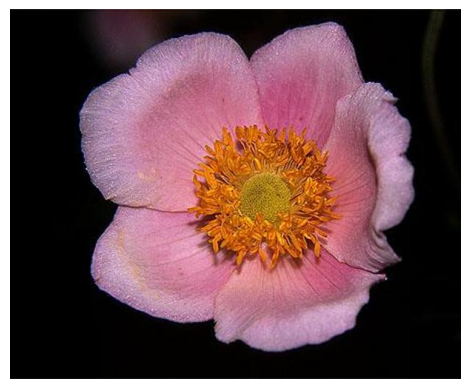

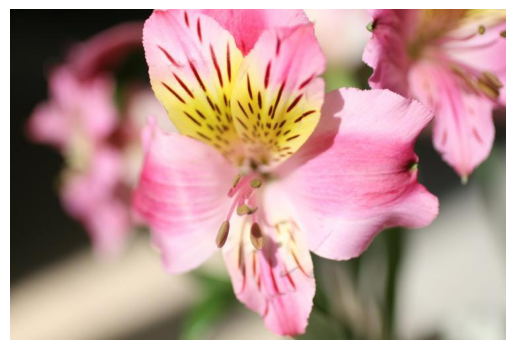

In [68]:
# Display the retrieved images
print("\n Here are some ideas for a bouquet arrangement based on your query: \n")
show_image_from_uri(results["uris"][0][0])
show_image_from_uri(results["uris"][0][1])

In [69]:
print("\n Images URI: \n")
print(f"Image 1: {results['uris'][0][0]}")
print(f"Image 2: {results['uris'][0][1]}")


 Images URI: 

Image 1: ./dataset/flowers-102-categories/flower_125.png
Image 2: ./dataset/flowers-102-categories/flower_60.png
